## Test ANN - Tensorflow

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Input, Concatenate, concatenate, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
model.layers[1].name

'dense'

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.7252 - acc: 0.7613 - val_loss: 0.5213 - val_acc: 0.8204
Epoch 2/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4902 - acc: 0.8292 - val_loss: 0.4848 - val_acc: 0.8258
Epoch 3/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4437 - acc: 0.8445 - val_loss: 0.4147 - val_acc: 0.8612
Epoch 4/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4162 - acc: 0.8535 - val_loss: 0.3986 - val_acc: 0.8608
Epoch 5/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3941 - acc: 0.8620 - val_loss: 0.3780 - val_acc: 0.8718
Epoch 6/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3784 - acc: 0.8677 - val_loss: 0.3794 - val_acc: 0.8692
Epoch 7/30
55000/55000 [==============================] - 2s 42us/sample - loss: 0.3646 - acc: 0.8706 - val_loss: 0.3

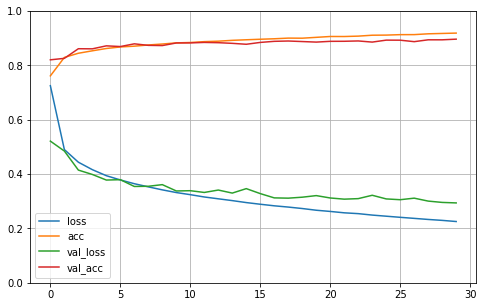

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [15]:
model.evaluate(X_test, y_test)

[62.60356554617882, 0.8528]

In [16]:
X_new = X_test[:3]

In [17]:
y_proba = model.predict(X_new)

In [18]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Building a Regression MLP Using the Sequential API

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [21]:
housing.data[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 27us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 22us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 21us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

In [24]:
#input = Input(shape=X_train.shape[1:])
#hidden1 = Dense(30, activation="relu")(input)
#hidden2 = Dense(30, activation="relu")(hidden1)
#concat = Concatenate()([input, hidden2])
#output = Dense(1)(concat)

#model = Model(inputs=[input], outputs=[output])

In [25]:
input_A = Input(shape=[5])
input_B = Input(shape=[6])
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = concatenate([input_A, hidden2])
output = Dense(1)(concat)
model = Model(inputs=[input_A, input_B], outputs=[output])

In [26]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

In [27]:
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 31us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 25us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

In [28]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

In [38]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    
    model = Sequential()
    options = {"input_shape": input_shape}
    
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", **options))
        options = {}
    
    model.add(Dense(1, **options))
    
    optimizer = SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [39]:
keras_reg = KerasRegressor(build_model)

In [40]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)

y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 28us/sample - loss: nan - val_loss: nan
Epoch 2/100
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 7/100
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 8/100
11610/11610 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 9/100
11610/11610 [==============================] - 0s 21us/sample - loss: nan - val_loss: nan
Epoch 10/100
11610/11610 [=======

In [45]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 30us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 20us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 19us/sample - loss: nan - val_loss: nan
Epoch 9/100
7740/7740 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 10/100
7740/7740 [============================

7740/7740 [==============================] - 0s 23us/sample - loss: 1.3231 - val_loss: 1.3490
Epoch 54/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.3231 - val_loss: 1.3490
Epoch 55/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.3231 - val_loss: 1.3489
Epoch 56/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.3231 - val_loss: 1.3489
Epoch 57/100
7740/7740 [==============================] - 0s 24us/sample - loss: 1.3231 - val_loss: 1.3489
Epoch 58/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.3231 - val_loss: 1.3490
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 51us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 31us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 27us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [

7740/7740 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 79us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 23us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 31us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 24us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 23us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 23us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 23us/sample - loss: nan - val_loss: nan
Epoch 9/100
7740/7740 [==============================] - 0s 24us

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001EA085E7D08>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA0863F888>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [46]:
rnd_search_cv.best_params_

{'learning_rate': 0.011727593349882064, 'n_hidden': 0, 'n_neurons': 89}

## Implementing Batch Normalization with Keras

In [53]:
model = Sequential([
    Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Dense(300, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(10, activation="softmax")
])

In [54]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_77 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_78 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)            

In [55]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [56]:
model.layers[1].updates

[<tf.Operation 'batch_normalization/cond_2/Merge' type=Merge>,
 <tf.Operation 'batch_normalization/cond_3/Merge' type=Merge>]

In [9]:
model = Sequential([
    Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Dense(300, kernel_initializer="he_normal", use_bias=False),
    BatchNormalization(),
    Activation("elu"),
    Dense(100, kernel_initializer="he_normal", use_bias=False),
    Activation("elu"),
    BatchNormalization(),
    Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               235200    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               3

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
#model_A = keras.models.load_model("my_model_A.h5")
#model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
#model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
#model_A_clone = keras.models.clone_model(model_A)
#model_A_clone.set_weights(model_A.get_weights())

In [ ]:
#for layer in model_B_on_A.layers[:-1]:
#    layer.trainable = False

In [ ]:
# compile your model after you freeze or unfreeze layers
#model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])